# Text detection and recognition on medicine Images

We build this project to detect and recognize text on madicine images
Similarity comparation is made both on text extracted from images
To identify the medicine of test image, we select the one with highest similarity score in database


# Following is the working flow diagram:
<hr>
<img src="noteimg/diagram.png" width="800">

# Following is the example result:
<hr>
<img src="noteimg/sampleresult.png" width="800">

In [28]:
# import all tools and libraries
import os
import cv2
import glob
import spacy
import time
import datetime
import data_helpers
import process_image
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import PIL
from PIL import Image
from random import randint
import matplotlib
import matplotlib.pyplot as plt
import pillowfight
import numpy as np
import pandas as pd
import sys
import pyocr
import pyocr.builders

%matplotlib inline
print('All tools are imported successfully')

All tools are imported successfully


In [29]:
# Next is to prepare Tesseract OCR tools
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
# The tools are returned in the recommended order of usage
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))
# Ex: Will use tool 'libtesseract'

langs = tool.get_available_languages()
print('There are 130 languages available!')
print('We will use following languages:')
print(*langs, sep = '\n')

Will use tool 'Tesseract (sh)'
There are 130 languages available!
We will use following languages:
fra
eng
spa
chi_sim


In [30]:
# build globle variables:
all_res = [] 
dic = {'file': '-'}
for l in langs:
    dic[l] = '-'
files_grabbed = []

In [24]:
# ** This step is optional for real dataset
# Clean database, remove images with low quality of text recognition
all_files = [] #create list for all files
# Load all type of available image files
ftypes = ('images/*.jpg', 'images/*.png','images/*.bmp', 'images/*.jpeg',
          'images/*.JPG', 'images/*.PNG', 'images/*.BMP', 'images/*.JPEG') 
for files in ftypes:
    all_files.extend(glob.glob(files))
print ('There are ' + str(len(all_files)) + ' images loaded')

# Remove all images which has text less than 15 characters
count = 1
for f in all_files:
    if i % 10 == 0 or i > (len(all_files)//10)*10:
        print(str(count) + '/' + str(len(all_files)) + ': ' + f + ' is being processed!')
    result = data_helpers.ext_txt(f, langs, dic, tool)
    total_length = 0
    for l in langs:
        length = len(result[l])
        total_length += length
    if total_length < 15:
        os.remove(f)
    count += 1
all_files = []
for files in ftypes:
    all_files.extend(glob.glob(files))
print ('After clean, there are ' + str(len(all_files)) + ' images now')

There are 132 images loaded
1/132: images/81vt8Z5kjOL._SL1500_.jpg is being processed!
2/132: images/spin_prod_ec_796525501.jpg is being processed!
3/132: images/Enzy-Restore.jpg is being processed!
4/132: images/TB1fWrVJVXXXXaOXXXXXXXXXXXX_!!2-item_pic.jpg is being processed!
5/132: images/00011822316453_1.jpg is being processed!
6/132: images/1.jpg is being processed!
7/132: images/00312547170314.jpg is being processed!
8/132: images/zeel_1024x1024.jpg is being processed!
9/132: images/1c4b5154305f3a0c27b61a589cae322c--asthma-relief-allergy-relief.jpg is being processed!
10/132: images/00011822302944.jpg is being processed!
11/132: images/449014_1280x720.jpg is being processed!
12/132: images/900 (3).jpg is being processed!
13/132: images/gallery-1494812328-arnicare-muscle-relief-rub-gel.jpg is being processed!
14/132: images/00011822145763.jpg is being processed!
15/132: images/08-home-remedies-insomnia.jpg is being processed!
16/132: images/176140471808595.jpg is being processed!
1

128/132: images/1b7cc06c-9f08-40a2-987b-6135ac950c07_2.0dfe59250f5d770e0fb6587eda5f7966.jpeg is being processed!
129/132: images/05af9370-6fb1-46c2-9b1a-7a3366d47369_1.39c54775d78a7fd68c4efc91a95723a1.jpeg is being processed!
130/132: images/King-Bio-Homeopathic-Acute-Pain-Relief-Cream-3-oz_web1_06302016094005012.jpeg is being processed!
131/132: images/King-Bio-Homeopathic-Natural-Medicine-Sciatic-Free-2-fl-oz_06302016100922740.jpeg is being processed!
132/132: images/Benadryl_Original.JPG is being processed!
After clean, there are 132 images now


In [31]:
#-Load all images files for detection
ftypes = ('images/*.jpg', 'images/*.png','images/*.bmp', 'images/*.jpeg',
          'images/*.JPG', 'images/*.PNG', 'images/*.BMP', 'images/*.JPEG') 

for files in ftypes:
    files_grabbed.extend(glob.glob(files))

print ('There are ' + str(len(files_grabbed)) + ' images loaded')

There are 132 images loaded


------fra
pharmacistrecommendedbrandd{ original formularamaminemotion sickness reliefi>n arere tr a r   treats symptoms robie elon the spotprevents nausea,dizziness & vomiting;/ actual sizeà ‘è' 36 tabletse e c ct (50 mg each)
------eng
pharmacistrecommendedbrandd< original formulaidmaminemotion sickness relief| > j -1 8 5 r-1am)ln b —   treats symptoms byon the spotprevents nausea,dizziness & vomiting!/ actual size& ‘e' 36 tabletss’ s ot (50 mg each)
------spa
pharmacistrecommendedbrandd< original formularamaminemotion sickness reliefeo ea aaa a-< a 006 a <—   treats symptoms tabieta aon the spotprevents nausea,dizziness 8 vomiting_,,/ actual sizeá ie' 36 tabletsaa s c (50 mg each)
------chi_sim
pharmacistrecommendedbrandd〈 original formulaigmdmnemotion sickness relief媚 一 8> a 一 8 2 一 g 一 8 e 3 5 c  treats symptoms rab0s n史 n the 5spotpreyents nause 卜 ,dpizziness & yomitingcacctual size36 tablets(50 mg each)


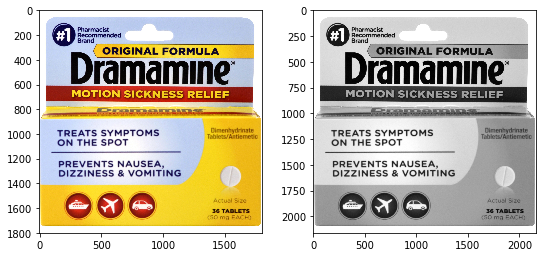

In [32]:
# Get a random image to show
randindex = randint(0, len(files_grabbed)-1)
process_image.improve(files_grabbed[randindex])
list2show = ['ori.jpg','gray.jpg']
plt.figure(figsize=(9,9))
columns = 2
for i, img in enumerate(list2show):
    img = Image.open(img)
    plt.subplot(len(list2show) / columns + 1, columns, i + 1)
    plt.imshow(img,cmap=plt.get_cmap("gray"))    
result = data_helpers.ext_txt(files_grabbed[randindex], langs, dic, tool)
for l in langs:
    print ('------' + l + '\n' + result[l])

In [35]:
#Following we recognize all images and write to database.
print('Following we recognize all images and write all text to database.')
i = 1
for f in files_grabbed:
    result = data_helpers.ext_txt(f, langs, dic, tool)
    time_str = datetime.datetime.now().isoformat()
    if i % 10 == 0 or i > (len(files_grabbed)//10)*10:
        print("{}: {}/{} processed".format(time_str, i, len(files_grabbed),))
    all_res.append(result.copy())
    i += 1
df = pd.DataFrame(all_res)
df.to_csv('result.csv', encoding='utf-8')
print('All images have been recognized and saved to result.csv')

Following we recognize all images and write all text to database.
2018-07-27T14:05:53.222165: 10/132 processed
2018-07-27T14:06:59.511033: 20/132 processed
2018-07-27T14:08:25.952338: 30/132 processed
2018-07-27T14:09:25.999755: 40/132 processed
2018-07-27T14:10:18.729585: 50/132 processed
2018-07-27T14:11:16.555145: 60/132 processed
2018-07-27T14:12:15.485232: 70/132 processed
2018-07-27T14:13:28.863305: 80/132 processed
2018-07-27T14:14:43.277902: 90/132 processed
2018-07-27T14:15:52.348790: 100/132 processed
2018-07-27T14:16:49.881963: 110/132 processed
2018-07-27T14:17:45.248776: 120/132 processed
2018-07-27T14:19:12.805465: 130/132 processed
2018-07-27T14:19:21.359001: 131/132 processed
2018-07-27T14:19:26.791687: 132/132 processed


In [36]:
#Save result to txt file for easy read
with open('result.txt', 'w', encoding = 'utf-8') as outf:
    for item in all_res:
        outf.write('--FileName:' + item['file'] + '\n')
        outf.write('--English:' + item['eng'] + '\n')
        outf.write('--Spanish:' + item['spa'] + '\n')
        outf.write('--French:' + item['fra']+ '\n')
        outf.write('--Chinese:' + item['chi_sim'] + '\n')

------fra
cough suppressant —topical analgesicst
------eng
[tv t lt ntopical analgesict
------spa
cough suppressant —topical analgesicto
------chi_sim
eeointme
134


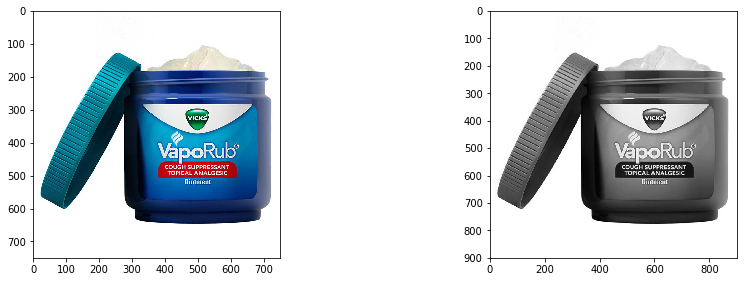

In [38]:
#Following is our test result
#Put test image as 'test.jpg' in the same foder of code
testf = 'test.jpg'
process_image.improve(testf)
list2show = ['ori.jpg','gray.jpg']
plt.figure(figsize=(15,10))
columns = 2
for i, img in enumerate(list2show):
    img = Image.open(img)
    plt.subplot(len(list2show) / columns + 1, columns, i + 1)
    plt.imshow(img,cmap=plt.get_cmap("gray"))    
result = data_helpers.ext_txt(testf, langs, dic, tool)
for l in langs:
    print ('------' + l + '\n' + result[l])
# Comparing with all records
ratiolist=[]
for res in all_res:
    s = ''
    sum = 0
    for l in langs:
        #s += l + ':' + str(data_helpers.similarity(res[l], result[l])) + ', '
        ratio = fuzz.partial_ratio(res[l], result[l])
        sum += ratio
    ratiolist.append(sum/len(langs))
print(len(ratiolist))

[31, 62, 57, 68, 130]
images/001829951.jpg


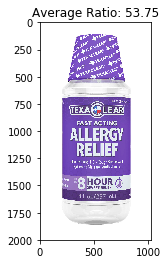

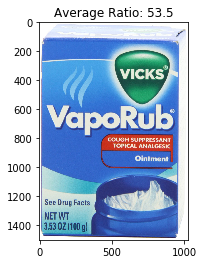

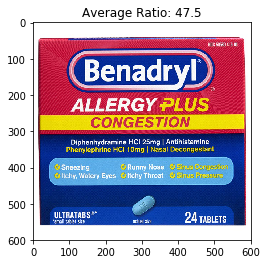

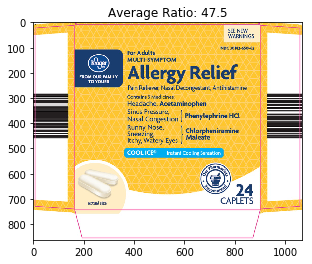

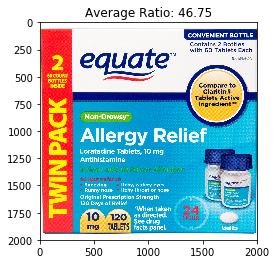

In [64]:
# Get top N results from database with maximum similarity
N = 5
topN = sorted(range(len(ratiolist)), key=lambda i: ratiolist[i], reverse=True)[:N]
print(topN)
for i,val in enumerate(topN):
    img = Image.open(all_res[val]['file'])
    plt.figure()
    plt.title('Average Ratio: ' + str(ratiolist[val]))
    plt.imshow(img) 
print(all_res[31]['file'])